<a href="https://colab.research.google.com/github/bluebluer/hello-wolrd/blob/master/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%923_1%263_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install torch

In [2]:
import torch
from time import time

In [3]:
print(torch.__version__)

1.10.0+cu111


In [4]:
a = torch.ones(500)
b = torch.ones(500)

In [5]:
start = time()
c = torch.zeros(500)
for i in range(500):
  c[i] = a[i] + b[i]
print(time()-start)

0.03857898712158203


In [6]:
# 矢量加法
start = time()
d = a + b
print(time()-start)

0.0001990795135498047


In [7]:
# 广播机制
a = torch.ones(3)
b = 10
print(a+b)

tensor([11., 11., 11.])


In [24]:
% matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [9]:
print(torch.__version__)

1.10.0+cu111


In [10]:
# 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] +true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)

In [11]:
print(features[0],labels[0])


tensor([ 2.7876, -0.0142]) tensor(9.8304)


In [26]:
def use_svg_display():
  display.set_matplotlib_formats('svg')

In [13]:
def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize

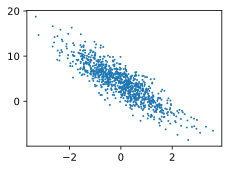

In [27]:
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [14]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [15]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1242,  0.9426],
        [ 1.2089,  0.3946],
        [ 1.9398,  1.2151],
        [-0.1897, -0.5488],
        [-2.6666, -0.7428],
        [-0.9478, -1.4317],
        [ 0.0875, -0.9261],
        [-0.0616,  0.1370],
        [-0.7709, -0.4242],
        [ 2.6769, -1.5594]]) 
 tensor([ 0.7365,  5.2716,  3.9280,  5.6772,  1.3975,  7.1774,  7.5155,  3.6146,
         4.1051, 14.8525])


In [16]:
# 初始化模型参数
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [17]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

In [18]:
# 定义模型
def linreg(X, w, b):  # 本函数已保存在d2lzh包中方便以后使用
    return torch.mm(X, w) + b

In [19]:
# 定义损失函数
def squared_loss(y_hat, y):  # 本函数已保存在pytorch_d2lzh包中方便以后使用
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [20]:
# 定义优化算法
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [21]:
# 训练模型
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.038952
epoch 2, loss 0.000151
epoch 3, loss 0.000053


In [22]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9992],
        [-3.3999]], requires_grad=True)
4.2 
 tensor([4.1994], requires_grad=True)
